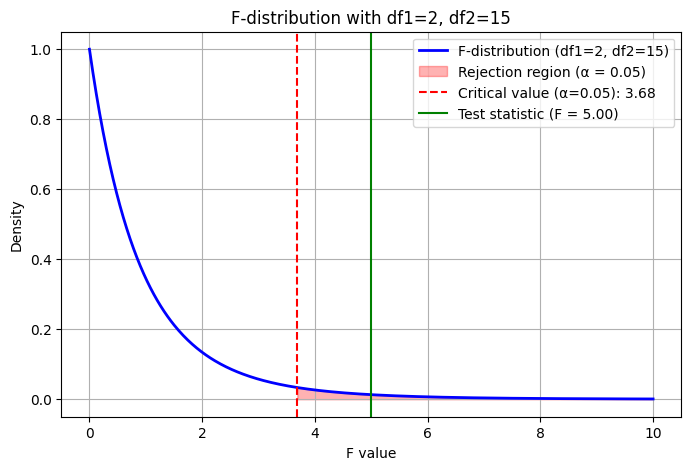

In [3]:
# 1️⃣  Import the tools we need
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

# 2️⃣  Set the parameters of the F‑distribution
df1, df2 = 2, 15           # degrees of freedom in the numerator and denominator

# 3️⃣  Create an array of F values (x‑axis)
x = np.linspace(0, 10, 500)

# 4️⃣  Compute the probability density for each x
y = f.pdf(x, df1, df2)

# 5️⃣  Find the critical value for alpha = 0.05 (upper‑tail test)
alpha = 0.05
critical_value = f.ppf(1 - alpha, df1, df2)

# 6️⃣  OPTIONAL – If you have a real test statistic, put it here
#     (Replace 5.0 with your own value or comment out if you don't have one)
test_statistic = 5.0      # <-- example value
# If you don't have a statistic, comment the next line out
# test_statistic_line = plt.axvline(test_statistic, color='g', linestyle='-', 
#                                   label=f'Test statistic (F = {test_statistic:.2f})')

# 7️⃣  Start drawing the plot
plt.figure(figsize=(8, 5))

# 7a️⃣  Plot the PDF curve
plt.plot(x, y, 'b-', lw=2, label=f'F‑distribution (df1={df1}, df2={df2})')

# 7b️⃣  Shade the rejection region (x > critical_value)
plt.fill_between(x, y, where=(x >= critical_value), color='red', alpha=0.3,
                 label='Rejection region (α = 0.05)')

# 7c️⃣  Draw the critical value line
plt.axvline(critical_value, color='r', linestyle='--',
            label=f'Critical value (α=0.05): {critical_value:.2f}')

# 7d️⃣  Draw the test statistic line (if you have one)
plt.axvline(test_statistic, color='g', linestyle='-', 
            label=f'Test statistic (F = {test_statistic:.2f})')

# 8️⃣  Add titles, labels and legend
plt.title('F‑distribution with df1=2, df2=15')
plt.xlabel('F value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)

# 9️⃣  Show the plot
plt.show()

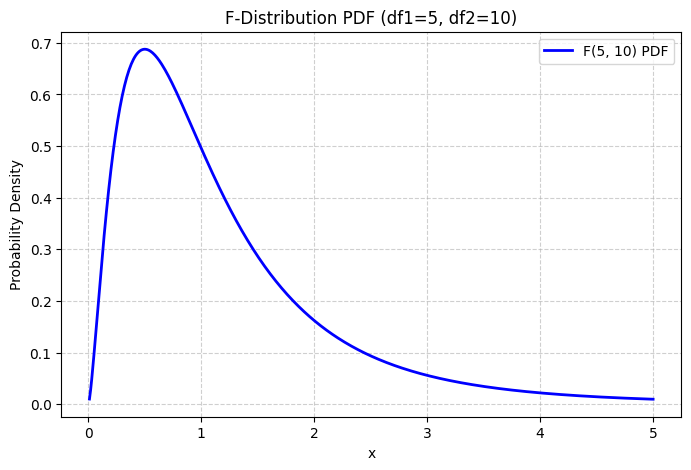

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def plot_f_distribution(df1, df2):
    """
    Plots the PDF of an F-distribution for given degrees of freedom.
    
    Parameters:
        df1 (int): Numerator degrees of freedom (>0)
        df2 (int): Denominator degrees of freedom (>0)
    """
    # Validate inputs
    if not (isinstance(df1, (int, float)) and isinstance(df2, (int, float))):
        raise TypeError("Degrees of freedom must be numeric.")
    if df1 <= 0 or df2 <= 0:
        raise ValueError("Degrees of freedom must be positive.")

    # Create x values (avoid zero to prevent division errors)
    x = np.linspace(0.01, 5, 500)
    
    # Compute PDF
    y = f.pdf(x, df1, df2)
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(x, y, 'b-', lw=2, label=f'F({df1}, {df2}) PDF')
    plt.title(f'F-Distribution PDF (df1={df1}, df2={df2})')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# Example usage:
plot_f_distribution(df1=5, df2=10)

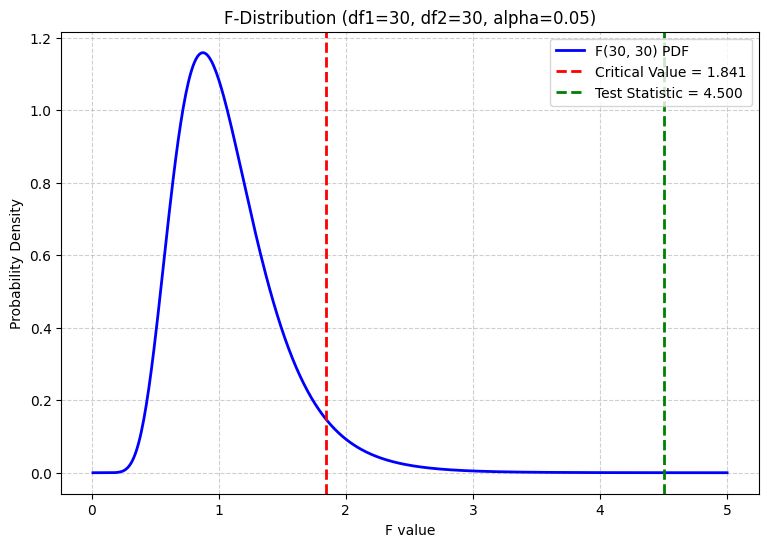

Reject H₀: Test statistic is in the rejection region.


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

def plot_f_distribution_with_critical(df1, df2, alpha=0.05, test_stat=None):
    """
    Plots the PDF of an F-distribution with critical value and test statistic lines.
    
    Parameters:
        df1 (int): Numerator degrees of freedom (>0)
        df2 (int): Denominator degrees of freedom (>0)
        alpha (float): Significance level (0 < alpha < 1)
        test_stat (float): Observed F test statistic (optional)
    """
    # Validate inputs
    if df1 <= 0 or df2 <= 0:
        raise ValueError("Degrees of freedom must be positive.")
    if not (0 < alpha < 1):
        raise ValueError("Alpha must be between 0 and 1.")
    
    # X range for plotting
    x = np.linspace(0.01, 5, 500)
    y = f.pdf(x, df1, df2)
    
    # Critical value for right-tailed test
    critical_value = f.ppf(1 - alpha, df1, df2)
    
    # Plot PDF
    plt.figure(figsize=(9, 6))
    plt.plot(x, y, 'b-', lw=2, label=f'F({df1}, {df2}) PDF')
    
    # Red line for critical value
    plt.axvline(critical_value, color='red', linestyle='--', lw=2,
                label=f'Critical Value = {critical_value:.3f}')
    
    # Green line for test statistic (if provided)
    if test_stat is not None:
        plt.axvline(test_stat, color='green', linestyle='--', lw=2,
                    label=f'Test Statistic = {test_stat:.3f}')
    
    # Title & labels
    plt.title(f'F-Distribution (df1={df1}, df2={df2}, alpha={alpha})')
    plt.xlabel('F value')
    plt.ylabel('Probability Density')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()
    
    # Print decision if test_stat is given
    if test_stat is not None:
        if test_stat > critical_value:
            print("Reject H₀: Test statistic is in the rejection region.")
        else:
            print("Fail to reject H₀: Test statistic is not in the rejection region.")

# Example usage:
plot_f_distribution_with_critical(df1=30, df2=30, alpha=0.05, test_stat=4.5)

In [11]:
import numpy as np
from scipy.stats import f_oneway

a1 = np.array([5, 6, 4, 7, 6, 5])   # low fertilizer or control 
a2 = np.array([9, 10, 11, 8, 9, 10]) # medium fertilizer
a3 = np.array([13, 14, 12, 15, 13, 14]) # high fertilizer

# Perform one-way ANOVA
F_stat, p_value = f_oneway(a1, a2, a3)

print("F-statistic:", F_stat)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Result: Significant differences among fertilizer levels (reject H0).")
else:
    print("Result: No significant differences (fail to reject H0).")


F-statistic: 87.27272727272727
p-value: 5.4680708963183e-09
Result: Significant differences among fertilizer levels (reject H0).


Install using command as follows: `pip install numpy matplotlib scipy`
